# Examples of basic experiments

Note that these are examples of work in process. Some results are shown here, but the complete code is not shared yet.

## Recognize source of the statement
*180302*

Given a sentece, recognize the probaility of source.

**Data** are pre-process html pages using several free python modules to give raw text of the html pages. The source of each html page is known, for example the publisher, root web, page. Metada such as authors, topics.. can be used too.

**Input** is sentences/stements/text

**Output** is probabity from which the input was taken.

C:/data/jasons/source_1.json
C:/data/jasons/source_2.json
C:/data/jasons/source_3.json
C:/data/jasons/source_4.json
C:/data/jasons/source_5.json
C:/data/jasons/source_6.json
----------------------------------------------------------
           ['V', 'normalnich', 'zpravach', 'se', 'nedocte']


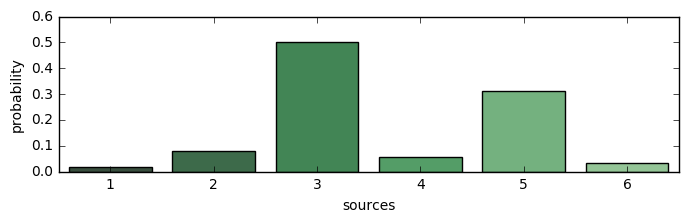

----------------------------------------------------------
           ['Ve', 'zpravach', 'se', 'nachazi']


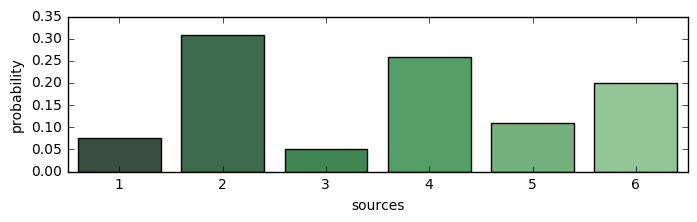

In [2]:
import htmljsonengines
import plotres

import sys
sys.path.append('..')
import init_ml
import basicsml

########## json text
path_jsons = 'C:/data/jasons/'

d = htmljsonengines.JsonEngine(log=0,path_jsons=path_jsons)

d.readJsons()
d.jsons2Lists()
d.lists2LLists()

id2sourceMapping = {1:'1',2:'2',3:'3',4:'4',5:'5',6:'6'} # anonymous sources

########### init vocab
C = basicsml.Classify_10(log=0)
C.create_vocab(X=d.lldata_)
C.fit_class_model(Y=d.ltarget_)

########### predict and plot
texts =[['V','normalnich','zpravach','se','nedocte'],['Ve','zpravach','se','nachazi']]

predicted = C.predict(texts)

print '----------------------------------------------------------'
print('           '+str(texts[0]))
plotres.PlotTest(predicted[0],id2source=id2sourceMapping,mode='seabar')
print '----------------------------------------------------------'
print('           '+str(texts[1]))
plotres.PlotTest(predicted[1],id2source=id2sourceMapping,mode='seabar')


--------------------

--------------------

## Space of sources
*180420*

It is interesting to see how the space of sources look like. Which sources have similar text/paragraphs, whose differ and, given the input text, place it in such a space.

For that, the features (details are not written yet) from the source text and projected into space where source texts that is similar is close to each other and more different texts are drawn further away from each other. T-SNE embedding was used for that. Given the the input text, compute its features and see where it is in this space. This gives better idea of to which sources it it closer, the wip is to estimate give an idea on how :)

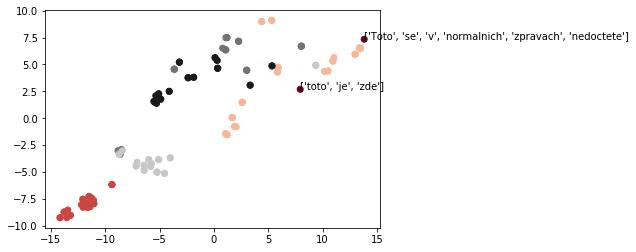

In [2]:
F = basicsml.FeaturesTest(log=10)
F.create_vocab(d.lldata_)
F.computeFtr(d.lldata_,d.ltarget_,[['Toto','se','v','normalnich','zpravach','nedoctete'],['toto','je','zde']])
F.plotEmbededFtr()